In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import warnings
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.0f}'.format
warnings.simplefilter(action='ignore', category=FutureWarning)

headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

In [3]:
for page in range(1,51):
    page_url = '{}&page={}'.format(sise_url, page)
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))
    df = pd.concat([df, table[0].dropna()])

df = df.rename(columns={"날짜":"date","시가":"open","고가":"high","저가":"low","종가":"close","거래량":"volume"})
df = df.reset_index(drop=True)
df.fillna('nan', inplace=True)
print(df)

           date   close    전일비    open    high     low    volume
0    2024.03.29 191,200  7,400 184,000 192,800 184,000 1,425,169
1    2024.03.28 183,800    400 182,500 186,300 182,000   896,928
2    2024.03.27 184,200  2,200 184,500 186,000 180,300   644,326
3    2024.03.26 186,400  2,500 188,800 191,500 185,500   690,399
4    2024.03.25 188,900    700 190,200 192,400 188,900   646,054
5    2024.03.22 188,200  2,400 185,600 188,900 185,500   571,289
6    2024.03.21 185,800  2,700 185,000 185,800 183,200   595,624
7    2024.03.20 183,100  1,300 185,300 185,500 183,000   374,043
8    2024.03.19 184,400  1,900 181,000 184,800 180,500   614,411
9    2024.03.18 182,500  1,700 180,900 184,400 180,300   534,945
10   2024.03.15 180,800  1,400 180,200 182,300 178,800 1,046,380
11   2024.03.14 179,400    600 178,700 180,500 178,600 1,833,620
12   2024.03.13 178,800  2,900 181,800 182,000 177,700   457,993
13   2024.03.12 181,700  2,200 180,300 182,000 176,000   422,573
14   2024.03.11 179,500  

In [4]:
df['sort'] = df.sort_index(ascending=False).indexesmk7m4
sort_df = df.sort_values(by='sort').copy()
date_format = "%Y.%m.%d"
df['date'] = pd.to_datetime(df['date'], format=date_format)
df.set_index('date',inplace=True)
# df['날짜_정수'] = df['date'].dt.strftime('%Y%m%d').astype(int)

df['sma5'] = sort_df['close'].rolling(window=5).mean()
df['sma25'] = sort_df['close'].rolling(window=25).mean()
df['sma100'] = sort_df['close'].rolling(window=100).mean()

ValueError: zero-size array to reduction operation maximum which has no identity

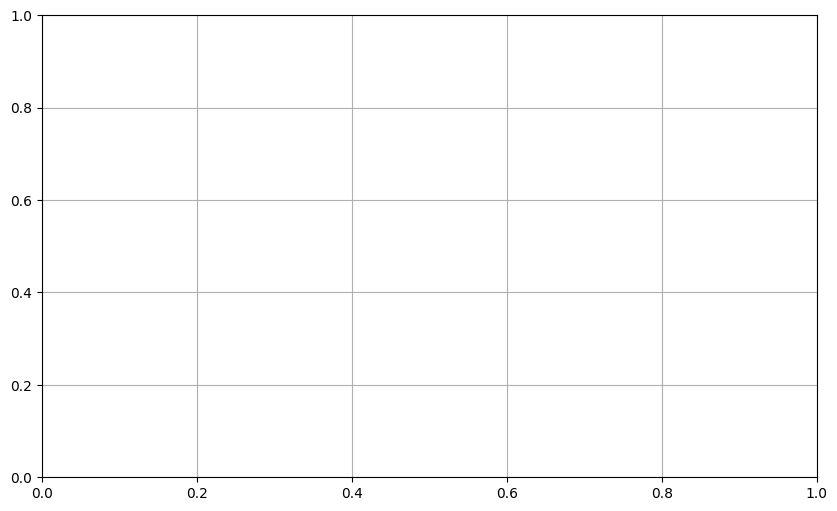

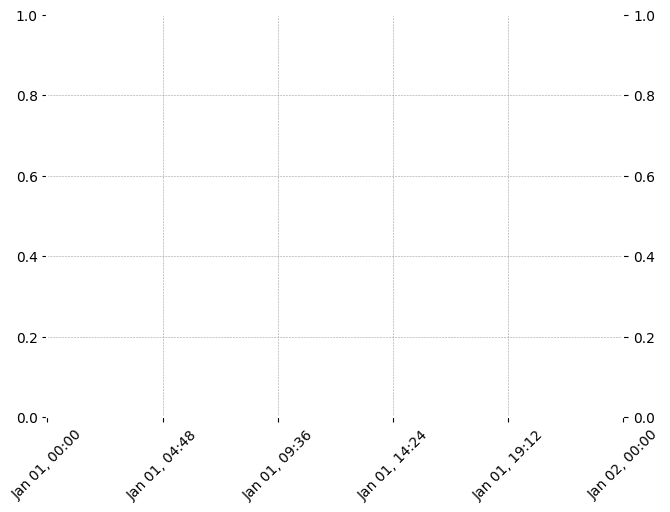

In [5]:
plt.figure(figsize=(10, 6))
# plt.plot(df['sort'].values,df['sma5'],label='SMA5', color='green')
# plt.plot(df['sort'].values,df['sma25'], label='SMA25', color='purple')
# plt.plot(df['sort'].values,df['sma100'], label='SMA100', color='blue')
plt.grid(True)
ap = mpf.make_addplot(df['sma5'],type='line',color = 'r', width=1)

mpf.plot(df, type='candle',addplot=ap ,style='charles',show_nontrading=True) 

mpf 캔들 차트에 addplot을 이용해서 sma5,25,100을 올리는 방법

ap = mpf.make_addplot(df['sma5'],type='line',color = 'r', width=1)

mpf.plot(df, type='candle',addplot=ap ,style='charles',show_nontrading=True) 

sma25,100도 같은 방법으로 올리기!